In [1]:
from scipy.spatial import distance as dist
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
input_path = "/content/drive/MyDrive/colab_img/histogram_similarity"
# initialize the index dictionary to store the image name and 
# corresponding histograms and the images dictionary to store the image
# themselves
index = {}
images = {}

for imagePath in glob.glob(input_path+"/*.PNG"):
  # extract the image filename (assumed to be unique) and load the image
  # , updating the images dictionary
  filename = imagePath[imagePath.rfind("/")+1:]
  image = cv2.imread(imagePath)
  images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # extract a 3D RGB color histogram from the image, using 8 bins per channel,
  # normalize, and update the index
  hist = cv2.calcHist([image], [0,1,2], None, [8,8,8],[0,256,0,256,0,256])
  hist = cv2.normalize(hist,hist).flatten()
  index[filename]= hist

METHOD 1: Using the OpenCV cv2.compareHist function

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


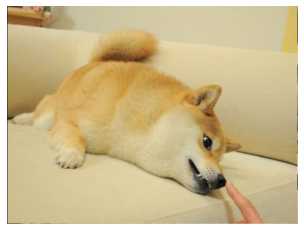

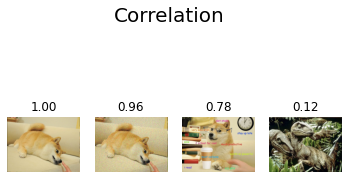

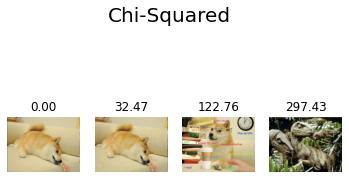

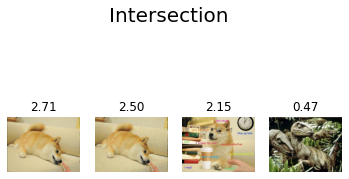

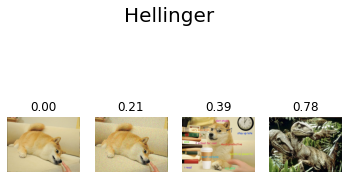

In [5]:
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA)
)

for methodName, method in OPENCV_METHODS:
  # initialize the results dictionary and the sort direction
  results = {}
  reverse = False

  # We start by initializing a reverse variable to False. 
  # This variable handles how sorting the results dictionary will be performed. 
  # For some similarity functions a LARGER value indicates higher similarity 
  # (Correlation and Intersection). And for others, a SMALLER value indicates 
  # higher similarity (Chi-Squared and Hellinger).

  # if weare using the correclation or intersection method, then sort the 
  # results in reverse order
  if methodName in ("Correlation", "Intersection"):
    reverse = True
  for k, hist in index.items():
    # compute the distance between the two histograms using the method
    # and update the results dictionary
    d = cv2.compareHist(index["histogram_similarity_1.PNG"], hist, method)
    results[k] = d

  # sort the result
  results = sorted([(v,k) for (k,v) in results.items()], reverse=reverse)

  fig = plt.figure("Query")
  ax = fig.add_subplot(1,1,1)
  ax.imshow(images["histogram_similarity_1.PNG"])
  plt.axis("off")

  # initialize the results figure
  fig = plt.figure("Results: %s"%(methodName))
  fig.suptitle(methodName, fontsize= 20)

  # loop over the results
  for i, (v,k) in enumerate(results):
    # show the result
    ax = fig.add_subplot(1, len(images), i+1)
    ax.set_title("%.2f"%( v))
    plt.imshow(images[k])
    plt.axis("off")

plt.show()

METHOD 2: Using the Scipy distance metrics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


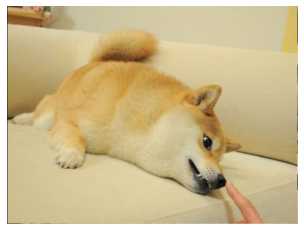

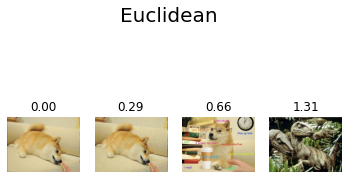

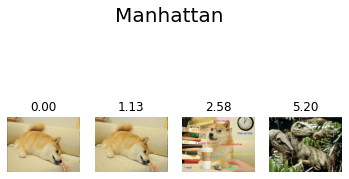

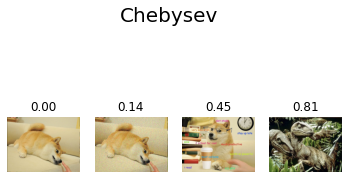

In [9]:
# initialize the scipy methods to compute distances
SCIPY_METHOD = (
    ("Euclidean", dist.euclidean),
    ("Manhattan", dist.cityblock),
    ("Chebysev", dist.chebyshev)
)

# loop over the comparisoon methods
for methodName, method in SCIPY_METHOD:
  # initialize the dictionary to store results
  results={}

  # loop over the index
  for k, hist in index.items():
    # compute the distance between the two histograms using the method and 
    # update the results dictionary
    d = method(index["histogram_similarity_1.PNG"], hist)
    results[k] = d

  # sort the results
  results = sorted([(v, k) for (k,v) in results.items()])

  # show the query images
  fig= plt.figure("Query")
  ax = fig.add_subplot(1,1,1)
  ax.imshow(images["histogram_similarity_1.PNG"])
  plt.axis("off")

  # initialize the results figure
  fig = plt.figure("Results: %s"%(methodName))
  fig.suptitle(methodName, fontsize=20)

  for i, (v, k) in enumerate(results):
    ax = fig.add_subplot(1,len(images), i+1)
    ax.set_title("%.2f"%(v))
    plt.imshow(images[k])
    plt.axis("off")

plt.show()

METHOD 3: Roll-your-own similarity measure

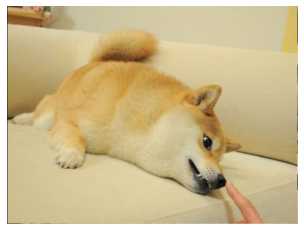

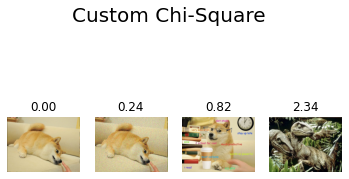

In [12]:
def chi2_distance(histA, histB, eps = 1e-10):
  # compute the chi-squared distance
  d = 0.5 * np.sum([((a-b)**2)/(a+b+eps) for (a,b) in zip(histA, histB)])

  return d

# initialize the results dictionary
results = {}

for k, hist in index.items():
  d = chi2_distance(index["histogram_similarity_1.PNG"], hist)
  results[k] = d

results = sorted([(v,k) for (k,v) in results.items()])

fig = plt.figure("Query")
ax = fig.add_subplot(1,1,1)
plt.imshow(images["histogram_similarity_1.PNG"])
plt.axis("off")

fig = plt.figure("Result : %s"%("Chi-Square"))
fig.suptitle("Custom Chi-Square", fontsize = 20)

for i, (v, k) in enumerate(results):
  ax = fig.add_subplot(1,len(images), i+1)
  ax.set_title("%.2f"%(v))
  plt.imshow(images[k])
  plt.axis("off")
plt.show()